In [9]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

## Importing pickled dataframe

In [7]:
with open("df_4N_reduced.pkl", "rb") as file:
    df_4N_reduced = pkl.load(file)

### Ligation Junction Analysis

- Analysis of Ligation Junctions for each VCG
- Make a heatmap for each VCG or the ones that are particularly skewed
- Use the columns VCG and 4N to look at the junction on the 3' end of the VCG
- USe the columns 5_Adap and VCG to look at the junction on the 5' end of the VCG

### Analyzing the junction at the 3' end of the VCG

<Axes: title={'center': "3' VCG and 5' 4N junction analysis"}, xlabel='4N', ylabel='VCG'>

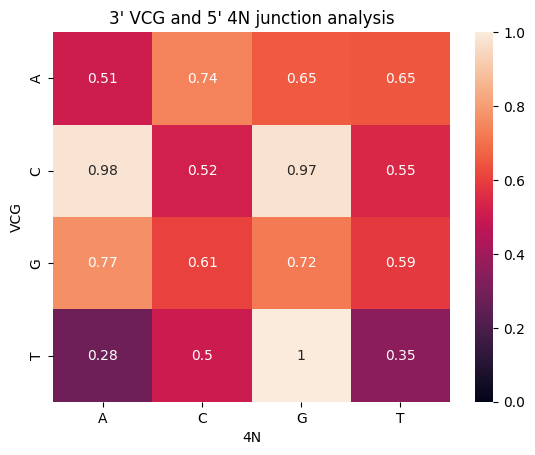

In [11]:
# Correlation between the right end of the VCG and the left end of our NNNN sequence.

r_VCG = df_4N_reduced["VCG"].str[-1]
l_4N  = df_4N_reduced["4N"].str[0]
corr_3 = pd.crosstab(r_VCG, l_4N)
corr_3 = corr_3 / corr_3.to_numpy().max()  # Normalizing the correlation values 

plt.title("3' VCG and 5' 4N junction analysis")
sns.heatmap(corr_3, annot=True, vmin=0, vmax=1)

### Analyzing the junction at the 5' end of the VCG

<Axes: title={'center': "5' VCG and 5' adaptor junction analysis"}, xlabel='5_Adap', ylabel='VCG'>

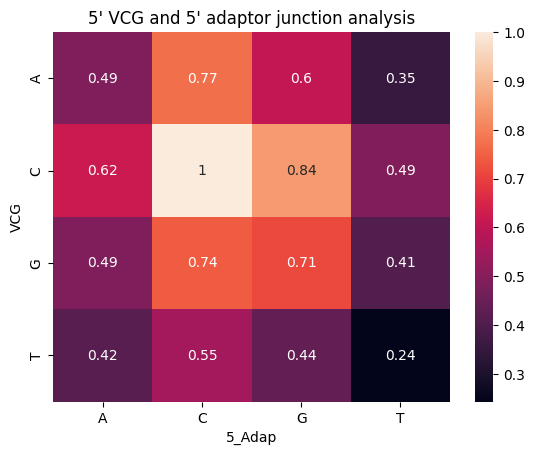

In [12]:
# Correlation between the left end of the VCG and the right end of our 5' adaptor.

l_VCG = df_4N_reduced["VCG"].str[0]
r_5p  = df_4N_reduced["5_Adap"].str[-1]
corr_5 = pd.crosstab(l_VCG, r_5p)
corr_5 = corr_5 / corr_5.to_numpy().max() # Normalizing the correlation values 

plt.title("5' VCG and 5' adaptor junction analysis")
sns.heatmap(corr_5, annot=True)

### Looking for any preferences between a specific VCG and the nucleotides at its 5' and 3' ends

In [13]:
d1 = pd.crosstab(df_4N_VCG["VCG"], l_4N)
d1

4N,A,C,G,T
VCG,,,,
AC,330,354,488,93
ACA,181,304,460,229
ACAC,154,109,585,80
ACACG,493,197,256,94
ACACGC,347,60,384,250
...,...,...,...,...
TGTGGTGA,93,141,162,399
TGTGGTGAT,81,186,343,164
TGTGGTGATG,162,310,136,44


In [14]:
d2 = pd.crosstab(df_4N_VCG["VCG"], r_5p)
d2

5_Adap,A,C,G,T
VCG,,,,
AC,260,427,399,179
ACA,247,427,274,226
ACAC,207,316,247,158
ACACG,213,427,244,156
ACACGC,249,390,263,139
...,...,...,...,...
TGTGGTGA,169,288,225,113
TGTGGTGAT,198,246,217,113
TGTGGTGATG,165,217,160,110
